In [1]:
!pip install numpy pandas keras nltk tensorflow scikitlearn

In [1]:
import numpy as np
import pandas as pd
import nltk
import keras
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [13]:
df=pd.read_excel('DAY WISE & HOURLY LOAD.xlsx')
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,DAYWISE MAXIMUM DELHI LOAD(MW),Unnamed: 4,Unnamed: 5,Unnamed: 6,HOURLY LOAD (MW),Unnamed: 8
0,NaN,NaN,NaN,DATE,MW,NaN,NaN,DATE,MW
1,NaN,NaN,NaN,1/1/2017 10:23:55 AM,3536.23877,NaN,NaN,1/1/2017 12:00:00 AM,1815.571045
2,NaN,NaN,NaN,1/2/2017 10:34:49 AM,3639.73877,NaN,NaN,1/1/2017 1:00:00 AM,1576.699585
3,NaN,NaN,NaN,1/3/2017 10:17:36 AM,3673.321289,NaN,NaN,1/1/2017 2:00:00 AM,1428.967896
4,NaN,NaN,NaN,1/4/2017 10:39:03 AM,3898.86084,NaN,NaN,1/1/2017 3:00:00 AM,1356.272705


In [19]:
df.drop(df.columns[[0,1,2,5,6]],axis=1,inplace=True)
df.head()


,DAYWISE MAXIMUM DELHI LOAD(MW),Unnamed: 4,HOURLY LOAD (MW),Unnamed: 8
0,DATE,MW,DATE,MW
1,1/1/2017 10:23:55 AM,3536.23877,1/1/2017 12:00:00 AM,1815.571045
2,1/2/2017 10:34:49 AM,3639.73877,1/1/2017 1:00:00 AM,1576.699585
3,1/3/2017 10:17:36 AM,3673.321289,1/1/2017 2:00:00 AM,1428.967896
4,1/4/2017 10:39:03 AM,3898.86084,1/1/2017 3:00:00 AM,1356.272705


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35065 entries, 0 to 35064
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   DAYWISE MAXIMUM  DELHI LOAD(MW)  1462 non-null   object
 1   Unnamed: 4                       1462 non-null   object
 2   HOURLY LOAD (MW)                 35065 non-null  object
 3   Unnamed: 8                       35065 non-null  object
dtypes: object(4)
memory usage: 1.1+ MB


In [21]:
df.isnull()

,DAYWISE MAXIMUM DELHI LOAD(MW),Unnamed: 4,HOURLY LOAD (MW),Unnamed: 8
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
35060,True,True,False,False
35061,True,True,False,False
35062,True,True,False,False
35063,True,True,False,False


In [30]:
df_hourly= df.iloc[1:,2:]
df_hourly.head()

,HOURLY LOAD (MW),Unnamed: 8
1,1/1/2017 12:00:00 AM,1815.571045
2,1/1/2017 1:00:00 AM,1576.699585
3,1/1/2017 2:00:00 AM,1428.967896
4,1/1/2017 3:00:00 AM,1356.272705
5,1/1/2017 4:00:00 AM,1354.029175


In [31]:
df_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 1 to 35064
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   HOURLY LOAD (MW)  35064 non-null  object
 1   Unnamed: 8        35064 non-null  object
dtypes: object(2)
memory usage: 548.0+ KB


In [32]:
df_hourly["date"]=pd.to_datetime(df_hourly["HOURLY LOAD (MW)"]).dt.date
df_hourly["time"]=pd.to_datetime(df_hourly["HOURLY LOAD (MW)"]).dt.time

<ipython-input-32-a5577c1def1b>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_hourly["date"]=pd.to_datetime(df_hourly["HOURLY LOAD (MW)"]).dt.date
<ipython-input-32-a5577c1def1b>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_hourly["time"]=pd.to_datetime(df_hourly["HOURLY LOAD (MW)"]).dt.time


In [35]:
df_hourly.head()


,HOURLY LOAD (MW),Unnamed: 8,date,time
1,1/1/2017 12:00:00 AM,1815.571045,2017-01-01,00:00:00
2,1/1/2017 1:00:00 AM,1576.699585,2017-01-01,01:00:00
3,1/1/2017 2:00:00 AM,1428.967896,2017-01-01,02:00:00
4,1/1/2017 3:00:00 AM,1356.272705,2017-01-01,03:00:00
5,1/1/2017 4:00:00 AM,1354.029175,2017-01-01,04:00:00


In [39]:
df_hourly.columns=['HOURLY LOAD (MW)','Load','Date','Time']
df_hourly.head()

,HOURLY LOAD (MW),Load,Date,Time
1,1/1/2017 12:00:00 AM,1815.571045,2017-01-01,00:00:00
2,1/1/2017 1:00:00 AM,1576.699585,2017-01-01,01:00:00
3,1/1/2017 2:00:00 AM,1428.967896,2017-01-01,02:00:00
4,1/1/2017 3:00:00 AM,1356.272705,2017-01-01,03:00:00
5,1/1/2017 4:00:00 AM,1354.029175,2017-01-01,04:00:00


In [41]:
df_hourly[df_hourly['Load']==df_hourly['Load'].max()]

,HOURLY LOAD (MW),Load,Date,Time
21905,7/2/2019 4:00:00 PM,7254.402344,2019-07-02,16:00:00


In [43]:
df_hourly[df_hourly['Load']==df_hourly['Load'].min()]

,HOURLY LOAD (MW),Load,Date,Time
1732,3/14/2017 3:00:00 AM,1156.65979,2017-03-14,03:00:00


In [45]:
!pip install seaborn

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-47-7aace10d9559>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_hourly['Load'])


<Axes: xlabel='Load', ylabel='Density'>

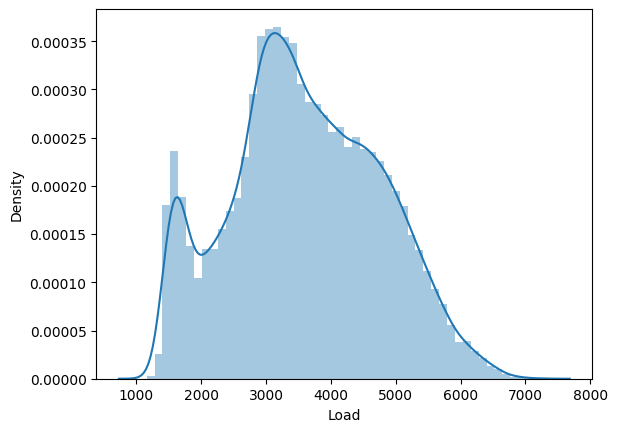

In [47]:
sns.distplot(df_hourly['Load'])

In [50]:
df_hourly["year"]=pd.to_datetime(df_hourly["HOURLY LOAD (MW)"]).dt.year

df_hourly["day"]=pd.to_datetime(df_hourly["HOURLY LOAD (MW)"]).dt.day

<ipython-input-50-f692355976a5>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_hourly["year"]=pd.to_datetime(df_hourly["HOURLY LOAD (MW)"]).dt.year
<ipython-input-50-f692355976a5>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_hourly["day"]=pd.to_datetime(df_hourly["HOURLY LOAD (MW)"]).dt.day


In [51]:
df_hourly.head()

,HOURLY LOAD (MW),Load,Date,Time,day,year
1,1/1/2017 12:00:00 AM,1815.571045,2017-01-01,00:00:00,1,2017
2,1/1/2017 1:00:00 AM,1576.699585,2017-01-01,01:00:00,1,2017
3,1/1/2017 2:00:00 AM,1428.967896,2017-01-01,02:00:00,1,2017
4,1/1/2017 3:00:00 AM,1356.272705,2017-01-01,03:00:00,1,2017
5,1/1/2017 4:00:00 AM,1354.029175,2017-01-01,04:00:00,1,2017


In [54]:
df_hourly["year"].unique()

array([2017, 2018, 2019, 2020], dtype=int32)

In [58]:
df_hourly[df_hourly["year"]==2017].nunique()

,0
HOURLY LOAD (MW),8760
Load,8718
Date,365
Time,24
day,31
year,1


<Axes: xlabel='Date', ylabel='Load'>

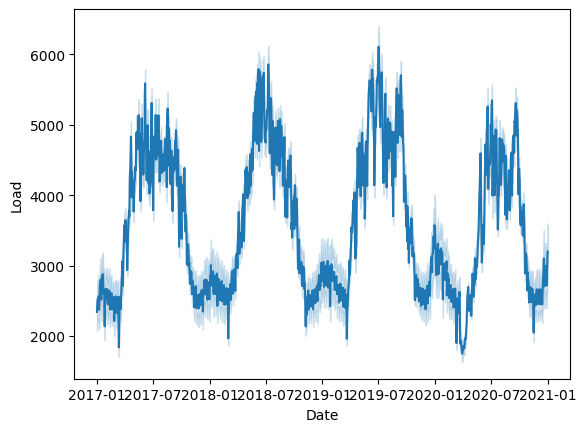

In [62]:
sns.lineplot(x="Date",y="Load",data=df_hourly)

TypeError: unsupported operand type(s) for *: 'datetime.date' and 'float'

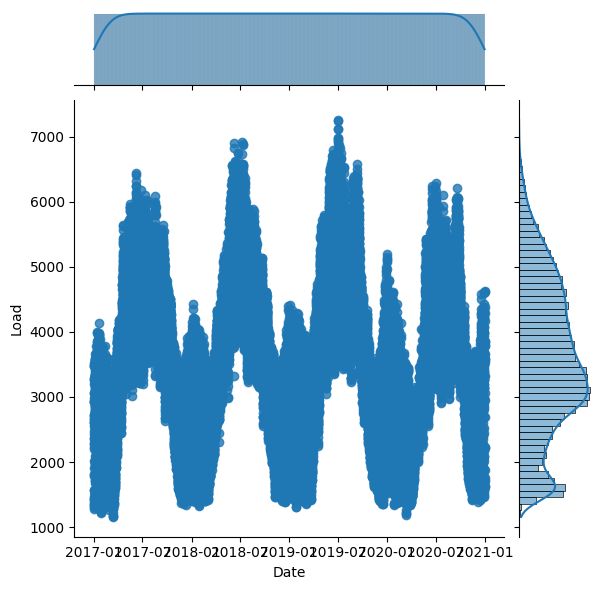

In [65]:
sns.jointplot(x="Date",y="Load",data=df_hourly,kind='reg')